In [1]:
import numpy as np
from numpy.random import rand, randn
from numpy.linalg import norm, solve
import matplotlib.pyplot as plt

In [4]:
def generate_data(beta, sig, n):
    u = np.random.rand(n, 1)
    y = (u ** np.arange(0, 4)) @ beta + sig * np.random.randn(n, 1)
    return u, y

In [5]:
np.random.seed(12)
beta = np.array([[10, -140, 400, -250]]).T
n = 100
sig = 5
u, y = generate_data(beta, sig, n)
xx = np.arange(np.min(u), np.max(u)+5e-3, 5e-3)
yy = np.polyval(np.flip(beta), xx)

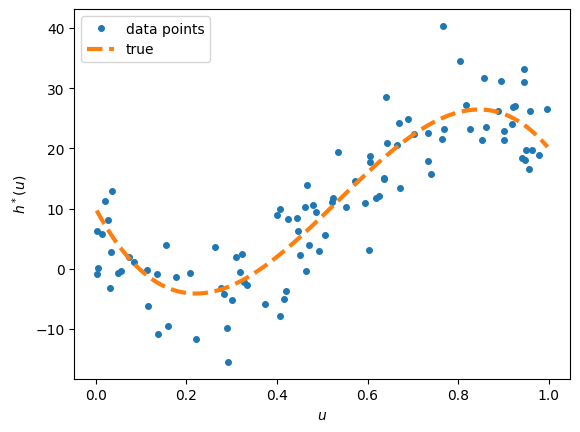

In [9]:
plt.plot(u, y, '.', markersize=8)
plt.plot(xx, yy, '--', linewidth=3)
plt.xlabel(r'$u$')
plt.ylabel(r'$h^*(u)$')
plt.legend(['data points', 'true'])
plt.savefig('polydatpy.pdf', format='pdf')
plt.show()

In [10]:
max_p = 18
p_range = np.arange(1, max_p + 1, 1)
X = np.ones((n, 1))
betahat, trainloss = {}, {}

for p in p_range:
    if p > 1:
        X = np.hstack((X, u**(p-1)))
        
    betahat[p] = solve(X.T @ X, X.T @ y)
    trainloss[p] = (norm(y - X @ betahat[p])**2/n)

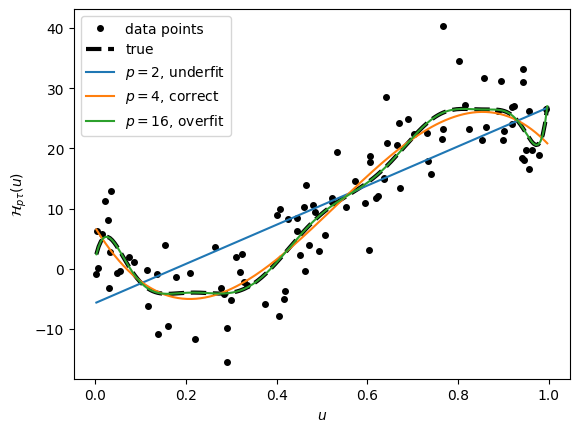

In [13]:
p = [2, 4, 16]

plots = [
    plt.plot(u, y, 'k.', markersize=8)[0],
    plt.plot(xx, yy, 'k--', linewidth=3)[0]
]

for i in p:
    yy = np.polyval(np.flip(betahat[i]), xx)
    plots.append(plt.plot(xx, yy)[0])
    
plt.xlabel(r'$u$')
plt.ylabel(r'${\mathcal{H}_p}_{\tau}(u)$')
plt.legend(plots, ('data points', 'true', '$p=2$, underfit', '$p=4$, correct', '$p=16$, overfit', 'd'))
plt.savefig('polydatpy2.pdf', format='pdf')
plt.show()

In [15]:
u_test, y_test = generate_data(beta, sig, n)

MSE = []
X_test = np.ones((n, 1))

for p in p_range:
    if p > 1:
        X_test = np.hstack((X_test, u_test**(p-1)))
        
    y_hat = X_test @ betahat[p]
    MSE.append(np.sum((y_test - y_hat)**2/n))

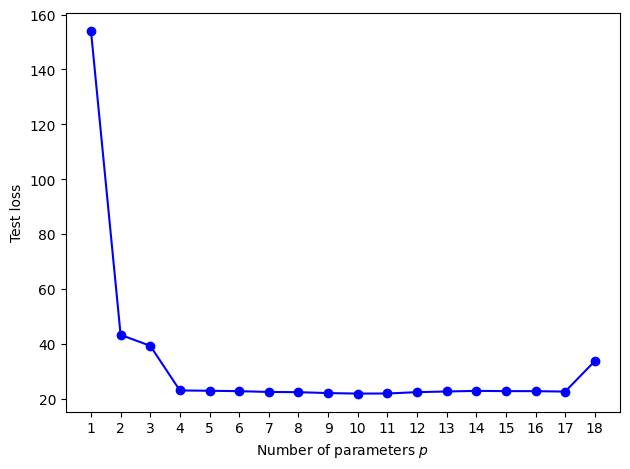

In [16]:
plt.plot(p_range, MSE, 'b', p_range, MSE, 'bo')
plt.xticks(ticks=p_range)
plt.xlabel('Number of parameters $p$')
plt.ylabel('Test loss')
plt.tight_layout()
plt.savefig('MSEpy.pdf',format='pdf')
plt.show()

In [19]:
K_vals = [5, 10, 100]
cv = np.zeros((len(K_vals), max_p))
X = np.ones((n, 1))

for p in p_range:
    if p > 1:
        X = np.hstack((X, u**(p - 1)))
    j = 0
    for K in K_vals:
        loss = []
        for k in range(1, K+1):
            test_ind = ((n/k)*(k-1) + np.arange(1, n/K + 1) - 1).astype('int')
            train_ind = np.setdiff1d(np.arange(n), test_ind)
            
            X_train, y_train = X[train_ind, :], y[train_ind, :]
            X_test, y_test = X[test_ind, :], y[test_ind]
            
            betahat = solve(X_train.T @ X_train, X_train.T @ y_train)        
            loss.append(norm(y_test - X_test @ betahat) ** 2)
            
        cv[j, p-1] = sum(loss) / n
        j += 1

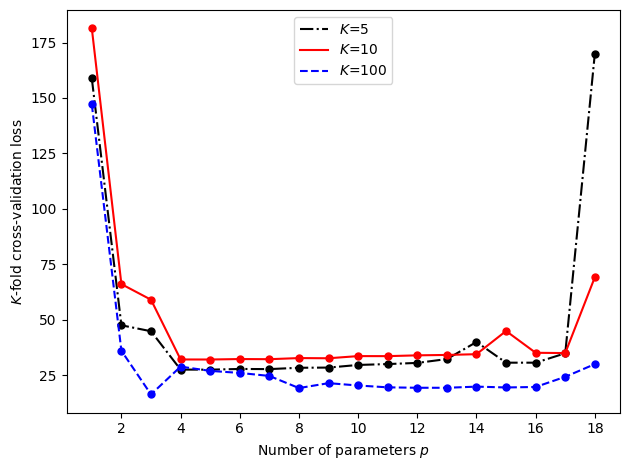

In [20]:
p1 = plt.plot(p_range, cv[0, :], 'k-.', p_range, cv[0, :], 'k.', markersize=10)[0]
p2 = plt.plot(p_range, cv[1, :], 'r', p_range, cv[1, :], 'r.', markersize=10)[0]
p3 = plt.plot(p_range, cv[2, :], 'b--', p_range, cv[2, :], 'b.', markersize=10)[0]
plt.xticks(range(2, 19, 2))
plt.xlabel('Number of parameters $p$')
plt.ylabel('$K$-fold cross-validation loss')
plt.legend((p1,p2,p3),('$K$=5','$K$=10','$K$=100'))
plt.tight_layout()
plt.savefig('crossvalpy.pdf',format='pdf')
plt.show()